# XGBOOST Regression
### Uses version 2.0 of the preprocessing framework.

In [1]:
from perovskiteml.data import ExpandedDataset
from perovskiteml.preprocessing import PrunerFactory
from perovskiteml.utils.config_parser import load_config
from perovskiteml.models import ModelFactory


In [2]:
config = load_config("../src/perovskiteml/configs/experiments/example.toml")
config

{'experiment': {'name': 'example_experiment',
  'seed': 42,
  'neptune': True,
  'verbose': 1},
 'data': {'target_feature': 'JV_default_PCE',
  'cache_dir': 'src/perovskiteml/data/expanded',
  'force_recompute': False},
 'pruning': {'method': 'chain_pruner',
  'steps': [{'method': 'feature_pruner',
    'sections': ['Reference information',
     'Cell definition',
     'Outdoor testing',
     'JV data'],
    'features': ['Outdoor_time_start', 'Outdoor_time_end']},
   {'method': 'breadth_pruner', 'sparsity_threshold': 0.25},
   {'method': 'depth_pruner', 'layer_coverage': 0.75}]},
 'model': {'model_type': 'xgboost',
  'eta': 0.1,
  'max_depth': 10,
  'n_estimators': 1000},
 'hyperparameters': {'n_trials': 200,
  'direction': 'maximize',
  'study_name': 'example_opt',
  'model': {'eta': {'type': 'float', 'low': 0.0001, 'high': 0.1, 'log': True},
   'max_depth': {'type': 'int', 'low': 3, 'high': 10}},
  'pruning': [{'method': 'breadth_pruner',
    'sparsity_threshold': {'type': 'float', 'l

In [3]:
dataset = ExpandedDataset.cache_or_compute(
    target_feature="JV_default_PCE",
    cache_dir="../src/perovskiteml/data/expanded",
    source_dir="../src/perovskiteml/data/clean"
)
dataset.data

,Ref_ID_temp,Ref_ID,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,...,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
2,3,3,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
3,4,4,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
4,5,5,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42253,11,43623,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
42254,12,43624,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
42255,13,43625,Daniele T. Cuzzupè,True,10.1002/solr.202300770,Cuzzupè et al.,2023-10-11,Solar RRL,False,2023-12-01 _v1.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None
42256,10974,10974,Gerrit Boschloo,False,10.1039/c8se00450a,Baranwal et al.,2018-10-23,Sustainable Energy & Fuels,True,Historic dataset on 2020 11 22_v7.xlsx,...,NaN,NaN,NaN,None,False,None,False,None,False,None


In [4]:
pruner = PrunerFactory.create(config["pruning"])

In [5]:
model_handler = ModelFactory.create(config["model"])
model_handler.config

XGBoostConfig(model_type='xgboost', n_estimators=1000, early_stopping_rounds=None, eta=0.1, max_depth=10, random_state=42)

In [6]:
histboost_handler = ModelFactory.create({
    "model_type": "hist_gradient_boost",
    "max_iter": 1000,
    "verbose": True
})
histboost_handler.config

HistGradientBoostingConfig(model_type='hist_gradient_boost', learning_rate=0.1, random_state=42, max_depth=None, max_iter=1000, verbose=True)

In [7]:
dataset.reset_features()
pruner.prune(dataset)
dataset.metadata.processing_history

Pruning sections: ['Reference information', 'Cell definition', 'Outdoor testing', 'JV data']
Pruning features: ['Outdoor_time_start', 'Outdoor_time_end']


[FeaturePrunerConfig(method='feature_pruner', sections=['Reference information', 'Cell definition', 'Outdoor testing', 'JV data'], features=['Outdoor_time_start', 'Outdoor_time_end']),
 BreadthPrunerConfig(method='breadth_pruner', sparsity_threshold=0.25),
 DepthPrunerConfig(method='depth_pruner', layer_coverage=0.75)]

In [8]:
X, y = dataset.split_target()

In [9]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector

In [10]:
# Define the preprocessor
encoder = OrdinalEncoder(
    handle_unknown='use_encoded_value', 
    unknown_value=-1
) # Encodes categorical data using an ordinal encoder.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder

numerical_selector = make_column_selector(
    dtype_include=np.number
) # Selects the numerical features.
categorical_selector = make_column_selector(
    dtype_include=[bool, object]
) # Selects the categorical features.

preprocessor = ColumnTransformer([
    ('numerical', 'passthrough', numerical_selector), # Allows numerical features to pass.
    ('categorical', encoder, categorical_selector), # Encodes categorical features.
]) # Transforms numerical and categorical data separately.
preprocessor

ColumnTransformer(transformers=[('numerical', 'passthrough',
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EBBD6738C0>),
                                ('categorical',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001EBBD670DA0>)])

In [11]:
# The preprocessor creates a transformed version of the data without human readable feature name. Replace these with the original feature names.
all_columns = list(X.select_dtypes(np.number).columns) + list(X.select_dtypes([bool, object]).columns) # Create a list of feature names.

X_transformed = pd.DataFrame(preprocessor.fit_transform(X, y)) # Transform data
X_transformed.columns = all_columns # Replace column names


X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y, test_size=0.30, random_state=config["experiment"]["seed"]
)

In [15]:
print(X_train)

       Stability_average_over_n_number_of_cells  \
26255                                       1.0   
12702                                       1.0   
33706                                       1.0   
41305                                       1.0   
10993                                       1.0   
...                                         ...   
6265                                        1.0   
11284                                       1.0   
38158                                       1.0   
860                                         1.0   
15795                                       1.0   

       Stability_flexible_cell_number_of_bending_cycles  \
26255                                               0.0   
12702                                               0.0   
33706                                               0.0   
41305                                               0.0   
10993                                               0.0   
...                              

In [12]:
model = xgb.XGBRegressor(model_type="xgboost", max_depth=10, eta=0.1, n_estimators = 1000)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             model_type='xgboost', monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

In [13]:
model.fit(
    X_train, y_train,
    eval_set = [(X_val, y_val)],
    
)

[0]	validation_0-rmse:5.04240
[1]	validation_0-rmse:4.85736
[2]	validation_0-rmse:4.70183
[3]	validation_0-rmse:4.56975
[4]	validation_0-rmse:4.45173
[5]	validation_0-rmse:4.35368
[6]	validation_0-rmse:4.26805
[7]	validation_0-rmse:4.19085
[8]	validation_0-rmse:4.12642
[9]	validation_0-rmse:4.06573
[10]	validation_0-rmse:4.00722
[11]	validation_0-rmse:3.95839
[12]	validation_0-rmse:3.91492
[13]	validation_0-rmse:3.88006
[14]	validation_0-rmse:3.83622
[15]	validation_0-rmse:3.80654
[16]	validation_0-rmse:3.77839
[17]	validation_0-rmse:3.74938
[18]	validation_0-rmse:3.72144
[19]	validation_0-rmse:3.70075
[20]	validation_0-rmse:3.68357


c:\Users\Violet\Documents\GitHub\PerovskiteML\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:06:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model_type" } are not used.

  warnings.warn(smsg, UserWarning)


[21]	validation_0-rmse:3.66356
[22]	validation_0-rmse:3.63629
[23]	validation_0-rmse:3.62207
[24]	validation_0-rmse:3.60423
[25]	validation_0-rmse:3.58524
[26]	validation_0-rmse:3.57202
[27]	validation_0-rmse:3.55594
[28]	validation_0-rmse:3.54543
[29]	validation_0-rmse:3.52648
[30]	validation_0-rmse:3.52096
[31]	validation_0-rmse:3.50983
[32]	validation_0-rmse:3.50137
[33]	validation_0-rmse:3.48517
[34]	validation_0-rmse:3.47951
[35]	validation_0-rmse:3.47083
[36]	validation_0-rmse:3.45725
[37]	validation_0-rmse:3.45295
[38]	validation_0-rmse:3.44556
[39]	validation_0-rmse:3.44218
[40]	validation_0-rmse:3.43805
[41]	validation_0-rmse:3.43188
[42]	validation_0-rmse:3.42569
[43]	validation_0-rmse:3.41725
[44]	validation_0-rmse:3.41360
[45]	validation_0-rmse:3.40982
[46]	validation_0-rmse:3.40848
[47]	validation_0-rmse:3.39811
[48]	validation_0-rmse:3.39033
[49]	validation_0-rmse:3.38843
[50]	validation_0-rmse:3.38494
[51]	validation_0-rmse:3.38186
[52]	validation_0-rmse:3.37392
[53]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             model_type='xgboost', monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

In [16]:
model_handler.fit(X_train, y_train, X_val, y_val)

[0]	validation_0-rmse:5.04240
[1]	validation_0-rmse:4.85736
[2]	validation_0-rmse:4.70183
[3]	validation_0-rmse:4.56975
[4]	validation_0-rmse:4.45173
[5]	validation_0-rmse:4.35368
[6]	validation_0-rmse:4.26805
[7]	validation_0-rmse:4.19085
[8]	validation_0-rmse:4.12642
[9]	validation_0-rmse:4.06573
[10]	validation_0-rmse:4.00722
[11]	validation_0-rmse:3.95839
[12]	validation_0-rmse:3.91492
[13]	validation_0-rmse:3.88006
[14]	validation_0-rmse:3.83622
[15]	validation_0-rmse:3.80654
[16]	validation_0-rmse:3.77839
[17]	validation_0-rmse:3.74938
[18]	validation_0-rmse:3.72144
[19]	validation_0-rmse:3.70075
[20]	validation_0-rmse:3.68357
[21]	validation_0-rmse:3.66356
[22]	validation_0-rmse:3.63629
[23]	validation_0-rmse:3.62207
[24]	validation_0-rmse:3.60423
[25]	validation_0-rmse:3.58524
[26]	validation_0-rmse:3.57202
[27]	validation_0-rmse:3.55594
[28]	validation_0-rmse:3.54543
[29]	validation_0-rmse:3.52648
[30]	validation_0-rmse:3.52096
[31]	validation_0-rmse:3.50983
[32]	validation_0-

In [15]:
histboost_handler.fit(X_train, y_train, X_val, y_val)

Binning 0.013 GB of training data: 0.020 s
Binning 0.001 GB of validation data: 0.000 s
Fitting gradient boosted rounds:
Fit 1000 trees in 2.213 s, (31000 total leaves)
Time spent computing histograms: 0.881s
Time spent finding best splits:  0.331s
Time spent applying splits:      0.347s
Time spent predicting:           0.056s


In [24]:
np.sqrt(-histboost_handler.model.train_score_)

array([3.71691745, 3.58501387, 3.47354358, ..., 1.74119947, 1.74098286,
       1.74078384])

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

In [44]:
model = RandomForestRegressor()
model.fit(
    X_train, y_train,
)

RandomForestRegressor()

In [66]:
lc = learning_curve(model, X_transformed, y)

c:\Users\Violet\Documents\GitHub\PerovskiteML\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:20:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model_type" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Violet\Documents\GitHub\PerovskiteML\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model_type" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Violet\Documents\GitHub\PerovskiteML\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:20:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model_type" } are not used.

  warnings.warn(sm

In [47]:
import matplotlib.pyplot as plt

In [68]:
lc

(array([ 3380, 10986, 18593, 26199, 33806]),
 array([[0.88580749, 0.90839677, 0.90839677, 0.90839677, 0.90839677],
        [0.87835803, 0.88898821, 0.88250652, 0.88250652, 0.88250652],
        [0.87410022, 0.88081096, 0.87273673, 0.87610818, 0.87610818],
        [0.86543357, 0.8681714 , 0.86457232, 0.87015231, 0.87077169],
        [0.86816967, 0.86929514, 0.86600039, 0.87007643, 0.8612805 ]]),
 array([[0.28642949, 0.28366714, 0.25239937, 0.22990184, 0.17479434],
        [0.35621814, 0.35412788, 0.33520053, 0.34531221, 0.26941552],
        [0.40517696, 0.39564837, 0.38062959, 0.35695193, 0.31745306],
        [0.42435695, 0.41165373, 0.39236061, 0.36967181, 0.34473466],
        [0.43076873, 0.41438059, 0.42857053, 0.40013135, 0.3540552 ]]))

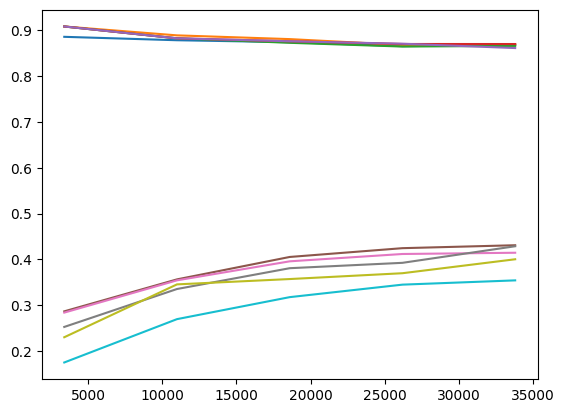

In [67]:
plt.plot(lc[0], lc[1])
plt.plot(lc[0], lc[2])

In [70]:
model.fit(
    X_train, y_train,
    eval_set = [(X_val, y_val)],
    
)

[0]	validation_0-rmse:5.04240
[1]	validation_0-rmse:4.85736
[2]	validation_0-rmse:4.70183
[3]	validation_0-rmse:4.56975
[4]	validation_0-rmse:4.45173
[5]	validation_0-rmse:4.35368
[6]	validation_0-rmse:4.26805
[7]	validation_0-rmse:4.19085
[8]	validation_0-rmse:4.12642
[9]	validation_0-rmse:4.06573
[10]	validation_0-rmse:4.00722
[11]	validation_0-rmse:3.95839
[12]	validation_0-rmse:3.91492
[13]	validation_0-rmse:3.88006
[14]	validation_0-rmse:3.83622
[15]	validation_0-rmse:3.80654
[16]	validation_0-rmse:3.77839


c:\Users\Violet\Documents\GitHub\PerovskiteML\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:23:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "model_type" } are not used.

  warnings.warn(smsg, UserWarning)


[17]	validation_0-rmse:3.74938
[18]	validation_0-rmse:3.72144
[19]	validation_0-rmse:3.70075
[20]	validation_0-rmse:3.68357
[21]	validation_0-rmse:3.66356
[22]	validation_0-rmse:3.63629
[23]	validation_0-rmse:3.62207
[24]	validation_0-rmse:3.60423
[25]	validation_0-rmse:3.58524
[26]	validation_0-rmse:3.57202
[27]	validation_0-rmse:3.55594
[28]	validation_0-rmse:3.54543
[29]	validation_0-rmse:3.52648
[30]	validation_0-rmse:3.52096
[31]	validation_0-rmse:3.50983
[32]	validation_0-rmse:3.50137
[33]	validation_0-rmse:3.48517
[34]	validation_0-rmse:3.47951
[35]	validation_0-rmse:3.47083
[36]	validation_0-rmse:3.45725
[37]	validation_0-rmse:3.45295
[38]	validation_0-rmse:3.44556
[39]	validation_0-rmse:3.44218
[40]	validation_0-rmse:3.43805
[41]	validation_0-rmse:3.43188
[42]	validation_0-rmse:3.42569
[43]	validation_0-rmse:3.41725
[44]	validation_0-rmse:3.41360
[45]	validation_0-rmse:3.40982
[46]	validation_0-rmse:3.40848
[47]	validation_0-rmse:3.39811
[48]	validation_0-rmse:3.39033
[49]	val

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             model_type='xgboost', monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)